<a href="https://colab.research.google.com/github/bidulki-99/UPDATA-DACON/blob/main/Assignment_week2/DACON%202%EC%A3%BC%EC%B0%A8%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/타이타닉/'

/content/drive/MyDrive/Colab Notebooks/타이타닉


In [ ]:
import os
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/타이타닉


In [ ]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
train['Sex'] = train['Sex'].replace('male', 0)
test['Sex'] = test['Sex'].replace('male', 0)
train['Sex'] = train['Sex'].replace('female', 1)
test['Sex'] = test['Sex'].replace('female', 1)

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train2 = train.dropna(subset = ['Embarked'])

In [ ]:
print(train2.shape)

(889, 12)


In [ ]:
train2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
import copy
train2 = train2.copy()
train2.loc[train2['Embarked'] == 'C', 'Embarked'] = 0
train2.loc[train2['Embarked'] == 'Q', 'Embarked'] = 1
train2.loc[train2['Embarked'] == 'S', 'Embarked'] = 2

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [ ]:
train2['Embarked'] = train2['Embarked'].astype(int)

In [ ]:
train2.corrwith(train2['Embarked'])

PassengerId    0.013166
Survived      -0.169718
Pclass         0.164681
Sex           -0.110320
Age           -0.032565
SibSp          0.068900
Parch          0.040449
Fare          -0.226311
Embarked       1.000000
dtype: float64

In [ ]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train[train['Fare'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train[train['Pclass'] == 1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
train[train['Survived'] == 1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
train.loc[train['Embarked'] == 'C', 'Embarked'] = 0
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 1
train.loc[train['Embarked'] == 'S', 'Embarked'] = 2
train['Embarked'] = train['Embarked'].astype('int64')

train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.108262
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.030394
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.108262,-0.030394,0.068230,0.039798,-0.224719,1.000000


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [ ]:
fare = pd.DataFrame(test[test['Pclass'] == 3]['Fare'].value_counts().nlargest(12))
fare = fare.reset_index()
fare

,index,Fare
0,7.7500,21
1,8.0500,17
2,7.8958,11
3,7.7750,10
4,7.2292,9
5,7.2250,9
6,8.6625,8
7,7.8542,8
8,7.8792,6
9,7.2500,5


In [ ]:
fare['index'].mean()

8.395141666666666

In [ ]:
test['Fare'] = test['Fare'].fillna('7.753825')
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train[['Fare']])
train_fare = ss.transform(train[['Fare']])
test_fare = ss.transform(test[['Fare']])

train['Fare2'] = train_fare
test['Fare2'] = test_fare

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,-0.488854


In [ ]:
data = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare2', 'Survived']]

In [ ]:
print(train['Age'].min(), train['Age'].max())

0.42 80.0


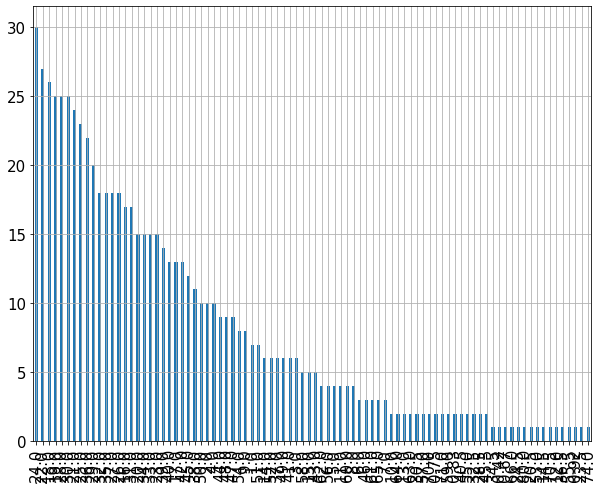

In [ ]:
CountStatus = pd.value_counts(train['Age'].values, sort = True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid = True, figsize = (10, 8), fontsize = 15)

In [ ]:
train['Age'].values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

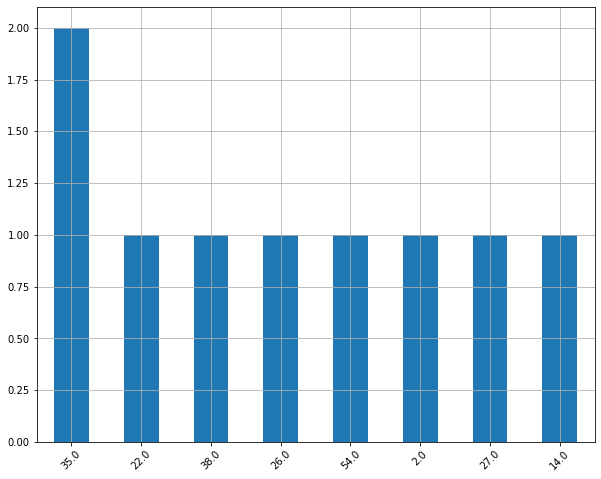

In [ ]:
import matplotlib.pyplot as plt
CountStatus = pd.value_counts(train['Age'].values[:10], sort = True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid = True, figsize = (10, 8), fontsize = 10)
plt.xticks(rotation = 45)

In [ ]:
train['Age'].isnull().sum()

177

In [ ]:
import numpy as np
import random as rnd

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train.pivot_table(values = 'Age', index = 'Pclass', aggfunc = 'mean')

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [ ]:
train_age_null = train[train.Age.isnull()]

In [ ]:
train_first = train_age_null[train_age_null.Pclass == 1]
train_second = train_age_null[train_age_null.Pclass == 2]
train_third = train_age_null[train_age_null.Pclass == 3]

In [ ]:
train_first = train_first.fillna(value = '38')
train_second = train_second.fillna(value = '30')
train_third = train_third.fillna(value = '25')

train_drop_na = train.dropna(subset = ['Age'])

train_concat = pd.concat([train_drop_na, train_first, train_second, train_third])
train = train_concat
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        362 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Fare2        891 non-null    float64
dtypes: float64(2), int64(7), object(4)
memory usage: 97.5+ KB


In [ ]:
train = train.astype({'Age': 'int'})
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Fare2     891 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    object 
 7   Embarked     418 non-null    int64  
 8   Fare2        418 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 32.7+ KB


In [ ]:
test_age_null = test[test.Age.isnull()]

test_first = test_age_null[test_age_null.Pclass == 1]
test_second = test_age_null[test_age_null.Pclass == 2]
test_third = test_age_null[test_age_null.Pclass == 3]

test_first = test_first.fillna(value = '38')
test_second = test_second.fillna(value = '30')
test_third = test_third.fillna(value = '25')

test_drop_na = test.dropna(subset = ['Age'])

test_concat = pd.concat([test_drop_na, test_first, test_second, test_third])
test = test_concat
test = test.astype({'Age': 'int'})
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    object 
 9   Cabin        173 non-null    object 
 10  Embarked     418 non-null    object 
 11  Fare2        418 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 42.5+ KB


In [ ]:
train = train.drop(['Cabin', 'Ticket', 'PassengerId'], axis = 1)
test = test.drop(['Cabin', 'Ticket'], axis = 1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
 9   Fare2     891 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 76.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    object 
 8   Embarked     418 non-null    object 
 9   Fare2        418 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 35.9+ KB


In [ ]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [ ]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare2
0,3,0,22,1,0,7.2500,2,-0.502445
1,1,1,38,1,0,71.2833,0,0.786845
2,3,1,26,0,0,7.9250,2,-0.488854
3,1,1,35,1,0,53.1000,2,0.420730
4,3,0,35,0,0,8.0500,2,-0.486337


In [ ]:
test.loc[test['Embarked'] == 'C', 'Embarked'] = 0
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 1
test.loc[test['Embarked'] == 'S', 'Embarked'] = 2
test['Embarked'] = test['Embarked'].astype('int64')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
 7   Fare2     891 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [ ]:
X_train = X_train.drop('Fare', axis = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    int64  
 6   Fare2     891 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 55.7 KB


In [ ]:
X_test = X_test.drop('Fare', axis = 1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int64  
 6   Fare2     418 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 26.1 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    int64  
 7   Fare2        418 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 29.4 KB


In [ ]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare2
0,892,3,0,34,0,0,7.8292,1,-0.490783
1,893,3,1,47,1,0,7.0,2,-0.507479
2,894,2,0,62,0,0,9.6875,1,-0.453367


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9809203142536476

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
svc.score(X_train, y_train)

0.6835016835016835

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.8417508417508418

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
dtc.score(X_train, y_train)

0.9809203142536476

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
dtr.score(X_train, y_train)

0.950844837503595

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

linear_reg = LinearRegression(n_jobs = -1)
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
linear_reg.score(X_train, y_train)

0.39967224600409246

In [ ]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
ridge.score(X_train, y_train)

0.3996656115603321

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
lasso.score(X_train, y_train)

0.39555243896111414

In [ ]:
elasticnet = ElasticNet(alpha = 0.5, l1_ratio = 0.2)
elasticnet.fit(X_train, y_train)

y_pred = elasticnet.predict(X_test)
elasticnet.score(X_train, y_train)

0.08771554748326449

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = [('RF', random_forest), ('DTC', dtc)], voting = 'soft')
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)
vc.score(X_train, y_train)

0.9809203142536476

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.3, max_depth = 10)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

0.9809203142536476

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [4, 6, 8, 10, 12]
}

xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 1)
xgb_grid.fit(X_train, y_train)

y_pred = xgb_grid.predict(X_test)
xgb_grid.score(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


0.8933782267115601

In [ ]:
scores = cross_val_score(dtc, X_train, y_train, scoring = 'accuracy', cv = 3)
print(scores.mean())

0.7620650953984288


In [ ]:
scores = cross_val_score(random_forest, X_train, y_train, scoring = 'accuracy', cv = 3)
print(scores.mean())

0.809203142536476


In [ ]:
scores = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = 3)
print(scores.mean())

0.6947250280583613


In [ ]:
scores = cross_val_score(svc, X_train, y_train, scoring = 'accuracy', cv = 3)
print(scores.mean())

0.6756453423120089


In [ ]:
train = train.drop(['Fare'], axis = 1)

In [ ]:
test = test.drop(['Fare'], axis = 1)

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                           "Survived": y_pred
                           })
submission.to_csv('titanic.csv', index = False)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
dtc.score(X_train, y_train)

submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                           "Survived": y_pred
                           })
submission.to_csv('titanic.csv', index = False)

In [ ]:
y_pred = xgb_grid.predict(X_test)
xgb_grid.score(X_train, y_train)

submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                           "Survived": y_pred
                           })
submission.to_csv('titanic.csv', index = False)